In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit.circuit.library import UnitaryGate
import numpy as np
from numpy import linalg 

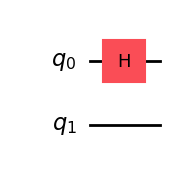

In [9]:
# for 2 qubits
qc = QuantumCircuit(2)

# Apply H-gate to the first qubit:
qc.h(0)


qc.draw('mpl')

Eigenvalues: [0.-1.j 0.-1.j] 

Eigenvectors: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


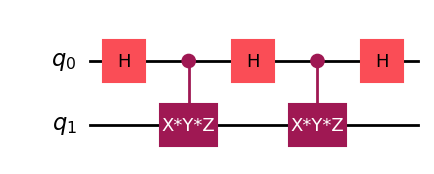

In [12]:
# Define the Hamiltonian for 1 qubit
X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')

H = UnitaryGate(X.compose(Y.compose(Z)), label='X*Y*Z')

#get eigenvectors and eigenvalues of the Hamiltonian
eigenvalues, eigenvectors = linalg.eig(H.to_matrix())
print(f"Eigenvalues: {eigenvalues} \n")
print(f"Eigenvectors: {eigenvectors}")


# In Phase estimation, the requirement for the quantum circuit is that it must be a Unitary matrix.
# So, we can use the UnitaryGate class to define the Hamiltonian.
# We will need to prepare an input state that is an eigenvector of the Hamiltonian.
# Then, we want to approximate the eigenvalue of the Hamiltonian.
# U*psi = e^(i*theta)*psi, where U is the Hamiltonian, psi is the eigenvector, and theta is the eigenvalue.

# apply the Hamiltonian to the second qubit, and turn first qubit into a control qubit
from qiskit.circuit import ControlledGate

CH = H.control(1)

qc.append(CH, [0, 1])

qc.h(0)


qc.draw('mpl')




# Down to business: Iterative Phase Estimation: 
## Replicating stuff from the paper "Arbitrary accuracy iterative phase estimation algorithm as a two qubit benchmark"

Source:https://arxiv.org/pdf/quant-ph/0610214

In [11]:
# Iterative PEA. We now describe the IPEA briefly, but
# still in some detail, in order to make the robustness analysis clear. The most straightforward approach for phase
# estimation is shown in Fig. 1. The upper line is the ancil lary qubit which is measured, and the lower line describes
# the qubits representing the physical system in which Uˆ operates. Initially the ancillary qubit is set to |0>
#  and the lower line register to an eigenstate |Ψ> of the operator Uˆwith eigenvalue e^{i2πφ}. 
# Right before the measurement the system state is 1/2 [(1+e^{i2πφ})|0> + (1−e^{i2πφ})|1>] |Ψ>.
# giving the probability P0 = cos2 (πφ) to measure ”0”.
#By repeating this procedure N times, P0 can be determined to an accuracy of 1/√N. 

# qc is an example of a quantum circuit that implements the IPEA.

q_0_initial_state = 0

# the initial state of the second qubit is an eigenvector of the Hamiltonian

# need the eigenvector of the Hamiltonian H

q_1_initial_state = eigenvectors[0]

# run the circuit




Instruction(name='unitary', num_qubits=1, num_clbits=0, params=[array([[0.-1.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])])